Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
# imports
import requests
import os
import pandas as pd
apikey = os.environ['FOURSQUARE_API']
from pprint import pprint

In [30]:
#citybikes
#Retrieving data for Mantova, Italy
def get_city(city_name):
    url = "http://api.citybik.es/v2/networks/" + city_name
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [35]:

city_name = "mantova"
city_json = get_city(city_name)
if city_json is not None:
    pprint(city_json)
else:
    print("failed to get city JSON")

{'network': {'company': ['Comunicare S.r.l.'],
             'href': '/v2/networks/bicincitta-mantova',
             'id': 'bicincitta-mantova',
             'location': {'city': 'Mantova',
                          'country': 'IT',
                          'latitude': 45.15866370764634,
                          'longitude': 10.783718973016335},
             'name': 'Bicincittà',
             'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=204',
             'stations': [{'empty_slots': 0,
                           'extra': {'number': 1,
                                     'reviews': 7,
                                     'score': 3.7,
                                     'status': 'offline',
                                     'uid': '1310'},
                           'free_bikes': 0,
                           'id': '9be01b509184baee960fcffa4f1425d3',
                           'latitude': 45.15866370764634,
                           'longitude': 10.783718973016335

In [28]:
data = response.json

In [67]:
# Check if city_json contains the 'network' key before extracting stations
if 'network' in city_json:
    stations = city_json['network'].get('stations', [])  # station list, or an empty list if not present
    
    
    if stations:
        # Flatten the stations data
        flattened_stations = pd.json_normalize(stations)

        # Create a DataFrame from the flattened data
        df1 = pd.DataFrame(flattened_stations)

        # Display the DataFrame
        pd.set_option('display.max_columns', None)
        pd.set_option('display.max_rows', None)
        print(df1)
    else:
        print("No stations found for this city.")
else:
    print("City data not available.")

   empty_slots  free_bikes                                id   latitude  \
0            0           0  9be01b509184baee960fcffa4f1425d3  45.158664   
1            0           0  2eb2a00e80e5d6fee19b932294a08927  45.147505   
2            0           0  f2703a28d2f9f3a0e4078867966d4536  45.162056   
3            0           0  2fd7039e15452a7a09b5ddca816a6375  45.157558   
4            8           0  a97d2eb0b413d91a627e8e661356471b  45.153567   
5            0           0  388ea79ccc1898766848156901c20c1b  45.157522   
6            0           0  5cd1352f5e895893f577ceba80c0bd41  45.162355   
7            0           0  43b4d9fcbb4e5b825350b3e43e9941af  45.150072   

   longitude                 name                    timestamp  extra.number  \
0  10.783719      Stazione FF.SS.  2023-08-02T22:51:07.196000Z             1   
1  10.795176         Porta Cerese  2023-08-02T22:51:07.197000Z             2   
2  10.811605          Campo Canoa  2023-08-02T22:51:07.197000Z             3   
3  1

In [61]:
#foursquare

url = "https://api.foursquare.com/v3/places/search?query=restaurant&ll=45.15866370764634%2C10.783718973016335&radius=1000"

#url = "https://api.foursquare.com/v3/places/search"
headers = {
    "accept": "application/json",
    "Authorization": "fsq3twCI7l4mloSQPK8QK00YCDLCHJPNRsle/zUHYF59lLk="
}
#for row in df.iterrows():
  #  lat_long = row["latitude"] + "," + row["longitude"]
   # params = {
   # "query": "restaurant",
   # "radius": 1000,
   # "ll":lat_long
  #      }
response = requests.get(url, headers=headers)

pprint(response.json())

{'context': {'geo_bounds': {'circle': {'center': {'latitude': 45.15866370764634,
                                                  'longitude': 10.783718973016335},
                                       'radius': 1000}}},
 'results': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
                                       'suffix': '.png'},
                              'id': 13003,
                              'name': 'Bar'},
                             {'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
                                       'suffix': '.png'},
                              'id': 13034,
                              'name': 'Café'},
                             {'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
                                       'suffix': '.png'},
                              'id': 13065,
                              'name': 'Restaurant'}],
              

In [66]:
df_json = response.json()
df_json = df_json['results']
df2 = pd.json_normalize(df_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df2

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.admin_region,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended
0,5270eabf11d283e6fe8550e9,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",[],25,/v3/places/5270eabf11d283e6fe8550e9,Bar Buffet Stazione Mantova,Europe/Rome,45.158514,10.784560,45.158514,10.784560,Piazza Don Eugenio Leoni 13,Lombardia,IT,,"Piazza Don Eugenio Leoni 13, 46100 Mantova Man...",Mantova,46100,Mantova,NaN,NaN,NaN
1,4f245cfbe4b04f6e69201041,"[{'id': 13134, 'name': 'Comfort Food Restauran...",[],257,/v3/places/4f245cfbe4b04f6e69201041,Osteria da Bice La Gallina Felice,Europe/Rome,45.156465,10.785125,45.156465,10.785125,Via Carbonati 4,Lombardia,IT,,"Via Carbonati 4, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.156605,10.785051,6
2,577e3ae3498e49f976d8a820,"[{'id': 13288, 'name': 'Kebab Restaurant', 'ic...",[],94,/v3/places/577e3ae3498e49f976d8a820,Lahore Kebab,Europe/Rome,45.157916,10.782667,45.157916,10.782667,Via Saverio Bettinelli 15,Lombardia,IT,,"Via Saverio Bettinelli 15, 46100 Mantova Lomba...",Mantova,46100,Lombardia,45.158014,10.782567,NaN
3,5ac0e08253159307708859aa,"[{'id': 13236, 'name': 'Italian Restaurant', '...",[],126,/v3/places/5ac0e08253159307708859aa,Bigoleria Al Torchio,Europe/Rome,45.158954,10.785214,45.158954,10.785214,Via Solferino e San Martino 31,Lombardia,IT,,"Via Solferino e San Martino 31, 46100 Mantova ...",Mantova,46100,Lombardia,45.159074,10.785152,NaN
4,4db48df14df05e5aaae24c83,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",[],373,/v3/places/4db48df14df05e5aaae24c83,Spirito Divino,Europe/Rome,45.159126,10.788632,45.159126,10.788632,Via Marangoni 34,Lombardia,IT,,"Via Marangoni 34, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.159029,10.788550,NaN
5,51000343e4b055a6fd7f829c,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],144,/v3/places/51000343e4b055a6fd7f829c,Caffè 29,Europe/Rome,45.157646,10.784735,45.157646,10.784735,Via Vittorio Emanuele,Lombardia,IT,,"Via Vittorio Emanuele, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.157454,10.784743,NaN
6,5a25fc13d552c759b76d699a,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],162,/v3/places/5a25fc13d552c759b76d699a,Bistro Bar Porta Pradella,Europe/Rome,45.157267,10.782822,45.157267,10.782822,Corso Vittorio Emanuele II 144,Lombardia,IT,,"Corso Vittorio Emanuele II 144, 46100 Mantova ...",Mantova,46100,Lombardia,45.157372,10.782817,NaN
7,5d62e04487398a00086a1006,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",[],168,/v3/places/5d62e04487398a00086a1006,Crosta,Europe/Rome,45.158101,10.785574,45.158101,10.785574,Via Bonomi 4,Lombardia,IT,,"Via Bonomi 4, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.158193,10.785714,D
8,4c488a70417b20a1af4be1a9,"[{'id': 13258, 'name': 'Trattoria', 'icon': {'...",[],504,/v3/places/4c488a70417b20a1af4be1a9,Ristorante Il Cigno dei Martini,Europe/Rome,45.160319,10.789726,45.160319,10.789726,Piazza Carlo d'Arco 1,Lombardia,IT,,"Piazza Carlo d'Arco 1, 46100 Mantova Lombardia",Mantova,46100,Lombardia,NaN,NaN,NaN
9,4e3d791db61cb577be7779a1,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],536,/v3/places/4e3d791db61cb577be7779a1,Rifugio,Europe/Rome,45.157239,10.777163,NaN,NaN,Lungolago dell'Arlecchino 6,Lombardia,IT,,"Lungolago dell'Arlecchino 6, 46100 Mantova Lom...",Mantova,46100,Lombardia,NaN,NaN,NaN


In [81]:
df2.rename(columns={'geocodes.main.latitude': 'latitude', 'geocodes.main.longitude': 'longitude'}, inplace=True)
df2

,fsq_id,categories,chains,distance,link,name,timezone,latitude,longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.admin_region,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended
0,5270eabf11d283e6fe8550e9,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",[],25,/v3/places/5270eabf11d283e6fe8550e9,Bar Buffet Stazione Mantova,Europe/Rome,45.158514,10.784560,45.158514,10.784560,Piazza Don Eugenio Leoni 13,Lombardia,IT,,"Piazza Don Eugenio Leoni 13, 46100 Mantova Man...",Mantova,46100,Mantova,NaN,NaN,NaN
1,4f245cfbe4b04f6e69201041,"[{'id': 13134, 'name': 'Comfort Food Restauran...",[],257,/v3/places/4f245cfbe4b04f6e69201041,Osteria da Bice La Gallina Felice,Europe/Rome,45.156465,10.785125,45.156465,10.785125,Via Carbonati 4,Lombardia,IT,,"Via Carbonati 4, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.156605,10.785051,6
2,577e3ae3498e49f976d8a820,"[{'id': 13288, 'name': 'Kebab Restaurant', 'ic...",[],94,/v3/places/577e3ae3498e49f976d8a820,Lahore Kebab,Europe/Rome,45.157916,10.782667,45.157916,10.782667,Via Saverio Bettinelli 15,Lombardia,IT,,"Via Saverio Bettinelli 15, 46100 Mantova Lomba...",Mantova,46100,Lombardia,45.158014,10.782567,NaN
3,5ac0e08253159307708859aa,"[{'id': 13236, 'name': 'Italian Restaurant', '...",[],126,/v3/places/5ac0e08253159307708859aa,Bigoleria Al Torchio,Europe/Rome,45.158954,10.785214,45.158954,10.785214,Via Solferino e San Martino 31,Lombardia,IT,,"Via Solferino e San Martino 31, 46100 Mantova ...",Mantova,46100,Lombardia,45.159074,10.785152,NaN
4,4db48df14df05e5aaae24c83,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",[],373,/v3/places/4db48df14df05e5aaae24c83,Spirito Divino,Europe/Rome,45.159126,10.788632,45.159126,10.788632,Via Marangoni 34,Lombardia,IT,,"Via Marangoni 34, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.159029,10.788550,NaN
5,51000343e4b055a6fd7f829c,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],144,/v3/places/51000343e4b055a6fd7f829c,Caffè 29,Europe/Rome,45.157646,10.784735,45.157646,10.784735,Via Vittorio Emanuele,Lombardia,IT,,"Via Vittorio Emanuele, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.157454,10.784743,NaN
6,5a25fc13d552c759b76d699a,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],162,/v3/places/5a25fc13d552c759b76d699a,Bistro Bar Porta Pradella,Europe/Rome,45.157267,10.782822,45.157267,10.782822,Corso Vittorio Emanuele II 144,Lombardia,IT,,"Corso Vittorio Emanuele II 144, 46100 Mantova ...",Mantova,46100,Lombardia,45.157372,10.782817,NaN
7,5d62e04487398a00086a1006,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",[],168,/v3/places/5d62e04487398a00086a1006,Crosta,Europe/Rome,45.158101,10.785574,45.158101,10.785574,Via Bonomi 4,Lombardia,IT,,"Via Bonomi 4, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.158193,10.785714,D
8,4c488a70417b20a1af4be1a9,"[{'id': 13258, 'name': 'Trattoria', 'icon': {'...",[],504,/v3/places/4c488a70417b20a1af4be1a9,Ristorante Il Cigno dei Martini,Europe/Rome,45.160319,10.789726,45.160319,10.789726,Piazza Carlo d'Arco 1,Lombardia,IT,,"Piazza Carlo d'Arco 1, 46100 Mantova Lombardia",Mantova,46100,Lombardia,NaN,NaN,NaN
9,4e3d791db61cb577be7779a1,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],536,/v3/places/4e3d791db61cb577be7779a1,Rifugio,Europe/Rome,45.157239,10.777163,NaN,NaN,Lungolago dell'Arlecchino 6,Lombardia,IT,,"Lungolago dell'Arlecchino 6, 46100 Mantova Lom...",Mantova,46100,Lombardia,NaN,NaN,NaN


In [82]:
df_combined = pd.concat([df1, df2])
df_combined

,empty_slots,free_bikes,id,latitude,longitude,name,timestamp,extra.number,extra.reviews,extra.score,extra.status,extra.uid,fsq_id,categories,chains,distance,link,timezone,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.admin_region,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended
0,0.0,0.0,9be01b509184baee960fcffa4f1425d3,45.158664,10.783719,Stazione FF.SS.,2023-08-02T22:51:07.196000Z,1.0,7.0,3.7,offline,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,2eb2a00e80e5d6fee19b932294a08927,45.147505,10.795176,Porta Cerese,2023-08-02T22:51:07.197000Z,2.0,1.0,1.0,offline,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,f2703a28d2f9f3a0e4078867966d4536,45.162056,10.811605,Campo Canoa,2023-08-02T22:51:07.197000Z,3.0,1.0,1.0,offline,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,2fd7039e15452a7a09b5ddca816a6375,45.157558,10.794851,Castiglioni,2023-08-02T22:51:07.197000Z,4.0,1.0,1.0,offline,1313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,0.0,a97d2eb0b413d91a627e8e661356471b,45.153567,10.797891,Anconetta,2023-08-02T22:51:07.197000Z,5.0,1.0,1.0,offline,1314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,388ea79ccc1898766848156901c20c1b,45.157522,10.790304,Umberto I,2023-08-02T22:51:07.197000Z,6.0,2.0,2.9,offline,1315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,5cd1352f5e895893f577ceba80c0bd41,45.162355,10.798728,Castello S. Giorgio,2023-08-02T22:51:07.197000Z,7.0,3.0,2.0,offline,1316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,43b4d9fcbb4e5b825350b3e43e9941af,45.150072,10.786767,Palazzo Te,2023-08-02T22:51:07.197000Z,8.0,1.0,1.0,offline,1499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,45.158514,10.784560,Bar Buffet Stazione Mantova,NaN,NaN,NaN,NaN,NaN,NaN,5270eabf11d283e6fe8550e9,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",[],25.0,/v3/places/5270eabf11d283e6fe8550e9,Europe/Rome,45.158514,10.784560,Piazza Don Eugenio Leoni 13,Lombardia,IT,,"Piazza Don Eugenio Leoni 13, 46100 Mantova Man...",Mantova,46100,Mantova,NaN,NaN,NaN
1,NaN,NaN,NaN,45.156465,10.785125,Osteria da Bice La Gallina Felice,NaN,NaN,NaN,NaN,NaN,NaN,4f245cfbe4b04f6e69201041,"[{'id': 13134, 'name': 'Comfort Food Restauran...",[],257.0,/v3/places/4f245cfbe4b04f6e69201041,Europe/Rome,45.156465,10.785125,Via Carbonati 4,Lombardia,IT,,"Via Carbonati 4, 46100 Mantova Lombardia",Mantova,46100,Lombardia,45.156605,10.785051,6


In [95]:
merged_df = pd.merge(df1, df2, on='latitude', how='outer')
print(merged_df)

    empty_slots  free_bikes                                id   latitude  \
0           0.0         0.0  9be01b509184baee960fcffa4f1425d3  45.158664   
1           0.0         0.0  2eb2a00e80e5d6fee19b932294a08927  45.147505   
2           0.0         0.0  f2703a28d2f9f3a0e4078867966d4536  45.162056   
3           0.0         0.0  2fd7039e15452a7a09b5ddca816a6375  45.157558   
4           8.0         0.0  a97d2eb0b413d91a627e8e661356471b  45.153567   
5           0.0         0.0  388ea79ccc1898766848156901c20c1b  45.157522   
6           0.0         0.0  5cd1352f5e895893f577ceba80c0bd41  45.162355   
7           0.0         0.0  43b4d9fcbb4e5b825350b3e43e9941af  45.150072   
8           NaN         NaN                               NaN  45.158514   
9           NaN         NaN                               NaN  45.156465   
10          NaN         NaN                               NaN  45.157916   
11          NaN         NaN                               NaN  45.158954   
12          

In [86]:
#merged_df = pd.merge(df1, df2, on='latitude', how='inner')
#print(merged_df)

Empty DataFrame
Columns: [empty_slots, free_bikes, id, latitude, longitude_x, name_x, timestamp, extra.number, extra.reviews, extra.score, extra.status, extra.uid, fsq_id, categories, chains, distance, link, name_y, timezone, longitude_y, geocodes.roof.latitude, geocodes.roof.longitude, location.address, location.admin_region, location.country, location.cross_street, location.formatted_address, location.locality, location.postcode, location.region, geocodes.drop_off.latitude, geocodes.drop_off.longitude, location.address_extended]
Index: []


In [94]:
#merged_df = pd.merge(df1, df2, on='latitude', how='left')
#print(merged_df)

   empty_slots  free_bikes                                id   latitude  \
0            0           0  9be01b509184baee960fcffa4f1425d3  45.158664   
1            0           0  2eb2a00e80e5d6fee19b932294a08927  45.147505   
2            0           0  f2703a28d2f9f3a0e4078867966d4536  45.162056   
3            0           0  2fd7039e15452a7a09b5ddca816a6375  45.157558   
4            8           0  a97d2eb0b413d91a627e8e661356471b  45.153567   
5            0           0  388ea79ccc1898766848156901c20c1b  45.157522   
6            0           0  5cd1352f5e895893f577ceba80c0bd41  45.162355   
7            0           0  43b4d9fcbb4e5b825350b3e43e9941af  45.150072   

   longitude_x               name_x                    timestamp  \
0    10.783719      Stazione FF.SS.  2023-08-02T22:51:07.196000Z   
1    10.795176         Porta Cerese  2023-08-02T22:51:07.197000Z   
2    10.811605          Campo Canoa  2023-08-02T22:51:07.197000Z   
3    10.794851          Castiglioni  2023-08-02T22:5

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [97]:
merged_df.head()

,empty_slots,free_bikes,id,latitude,longitude_x,name_x,timestamp,extra.number,extra.reviews,extra.score,extra.status,extra.uid,fsq_id,categories,chains,distance,link,name_y,timezone,longitude_y,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.admin_region,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended
0,0.0,0.0,9be01b509184baee960fcffa4f1425d3,45.158664,10.783719,Stazione FF.SS.,2023-08-02T22:51:07.196000Z,1.0,7.0,3.7,offline,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,2eb2a00e80e5d6fee19b932294a08927,45.147505,10.795176,Porta Cerese,2023-08-02T22:51:07.197000Z,2.0,1.0,1.0,offline,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,f2703a28d2f9f3a0e4078867966d4536,45.162056,10.811605,Campo Canoa,2023-08-02T22:51:07.197000Z,3.0,1.0,1.0,offline,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,2fd7039e15452a7a09b5ddca816a6375,45.157558,10.794851,Castiglioni,2023-08-02T22:51:07.197000Z,4.0,1.0,1.0,offline,1313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,0.0,a97d2eb0b413d91a627e8e661356471b,45.153567,10.797891,Anconetta,2023-08-02T22:51:07.197000Z,5.0,1.0,1.0,offline,1314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   empty_slots                  8 non-null      float64
 1   free_bikes                   8 non-null      float64
 2   id                           8 non-null      object 
 3   latitude                     18 non-null     float64
 4   longitude_x                  8 non-null      float64
 5   name_x                       8 non-null      object 
 6   timestamp                    8 non-null      object 
 7   extra.number                 8 non-null      float64
 8   extra.reviews                8 non-null      float64
 9   extra.score                  8 non-null      float64
 10  extra.status                 8 non-null      object 
 11  extra.uid                    8 non-null      object 
 12  fsq_id                       10 non-null     object 
 13  categories            

In [99]:
merged_df.shape

(18, 33)

In [100]:
merged_df.describe()

,empty_slots,free_bikes,latitude,longitude_x,extra.number,extra.reviews,extra.score,distance,longitude_y,geocodes.roof.latitude,geocodes.roof.longitude,geocodes.drop_off.latitude,geocodes.drop_off.longitude
count,8.000000,8.0,18.000000,8.000000,8.00000,8.00000,8.000000,10.000000,10.000000,9.000000,9.000000,7.000000,7.000000
mean,1.000000,0.0,45.157269,10.794880,4.50000,2.12500,1.700000,238.900000,10.784622,45.158256,10.785451,45.157963,10.784942
std,2.828427,0.0,0.003684,0.008578,2.44949,2.10017,1.067708,175.213806,0.003438,0.001133,0.002360,0.000902,0.001994
min,0.000000,0.0,45.147505,10.783719,1.00000,1.00000,1.000000,25.000000,10.777163,45.156465,10.782667,45.156605,10.782567
25%,0.000000,0.0,45.157246,10.789420,2.75000,1.00000,1.000000,130.500000,10.783257,45.157646,10.784560,45.157413,10.783780
50%,0.000000,0.0,45.157781,10.795014,4.50000,1.00000,1.000000,165.000000,10.784930,45.158101,10.785125,45.158014,10.785051
75%,0.000000,0.0,45.158881,10.798101,6.25000,2.25000,2.225000,344.000000,10.785484,45.158954,10.785574,45.158611,10.785433
max,8.000000,0.0,45.162355,10.811605,8.00000,7.00000,3.700000,536.000000,10.789726,45.160319,10.789726,45.159074,10.788550


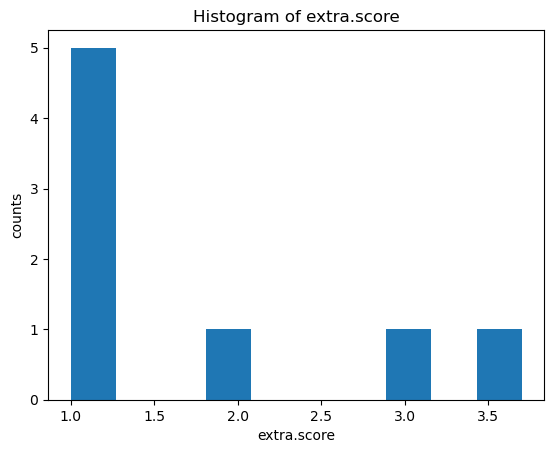

In [103]:
import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(merged_df['extra.score'])

# Customize other aspects of the plot
ax.set_title('Histogram of extra.score')
ax.set_xlabel('extra.score')
ax.set_ylabel('counts')

# Display the plot
plt.show()

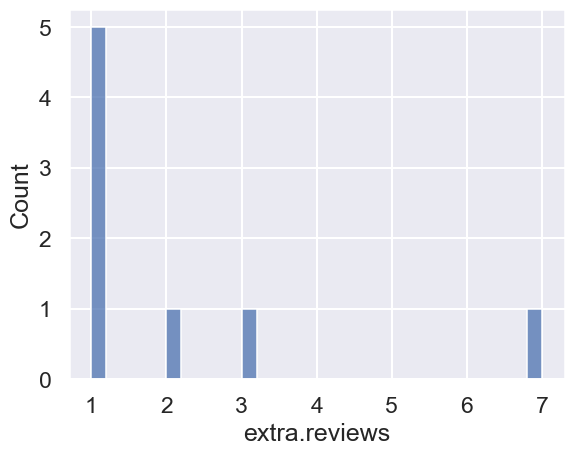

In [104]:
import seaborn as sns

sns.set_theme(context = 'talk',     # recomend   context = 'talk'
              style = 'darkgrid',
              palette = 'deep',         # colorblind
              font = 'sans-serif',
              font_scale = 1
             ) # this will affect both sns and plt

# you can also set a figure size that will affect all sns plots in your notebook
#sns.set(rc={"figure.figsize":(10, 6)})

#seaborn histogram
sns.histplot(data=merged_df, x="extra.reviews", bins=30)       # dont have to have to make a figure or subplot when using seaborn

plt.show()


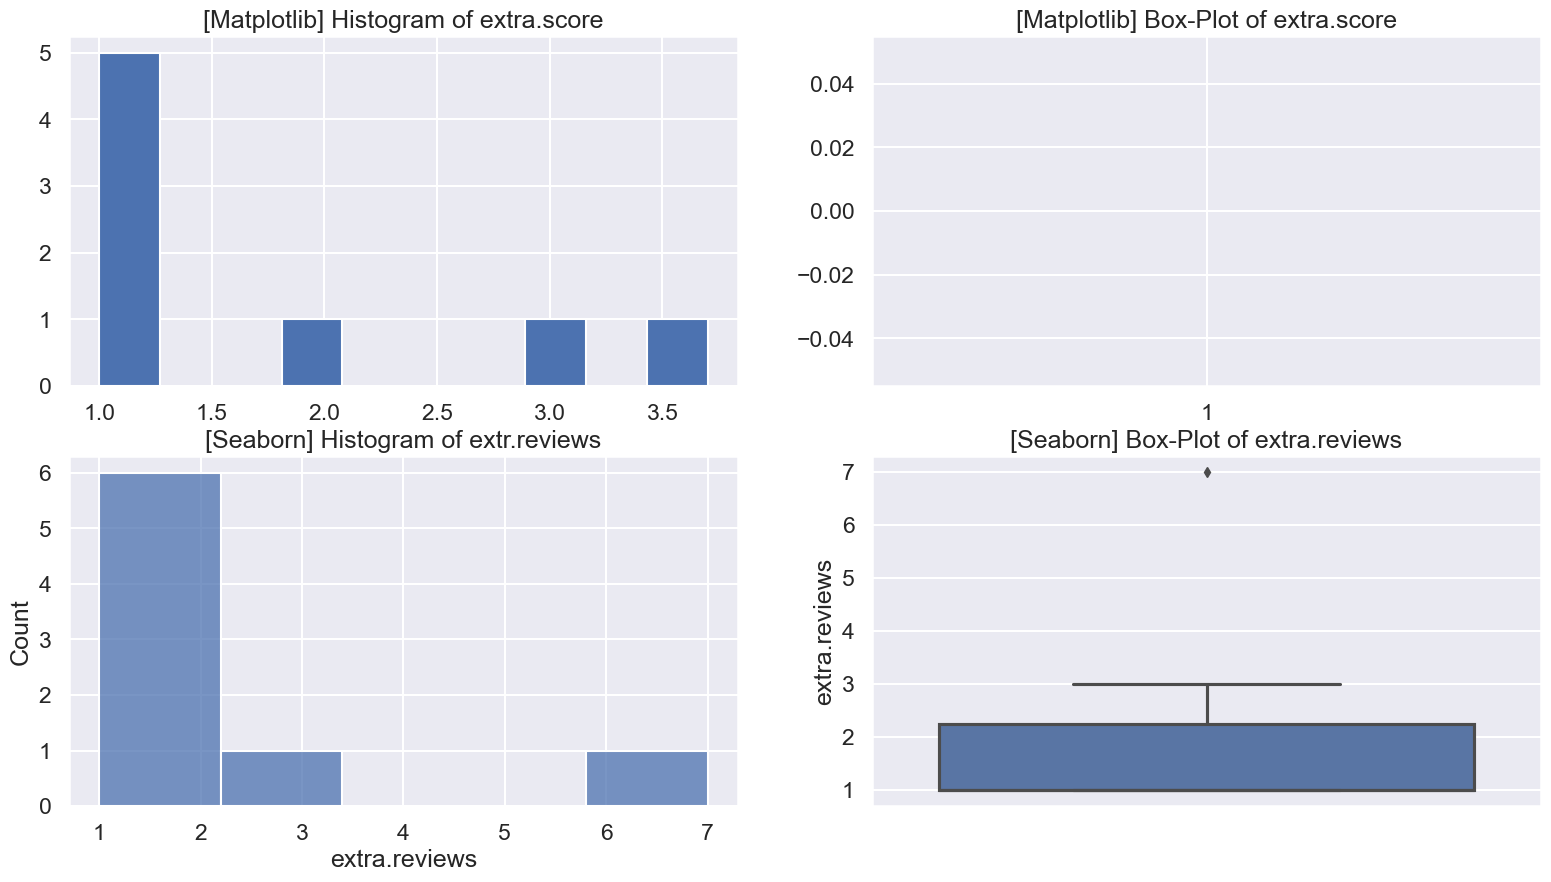

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(19, 10))

#matplotlib
axes[0,0].hist(merged_df['extra.score'])
axes[0,0].set_title('[Matplotlib] Histogram of extra.score')

axes[0,1].boxplot(merged_df['extra.score'])
axes[0,1].set_title('[Matplotlib] Box-Plot of extra.score')

#seaborn
sns.histplot(ax=axes[1,0], data=merged_df, x="extra.reviews")
axes[1,0].set_title('[Seaborn] Histogram of extr.reviews')

sns.boxplot(ax=axes[1,1], data=merged_df, y="extra.reviews")
axes[1,1].set_title('[Seaborn] Box-Plot of extra.reviews')

plt.show()

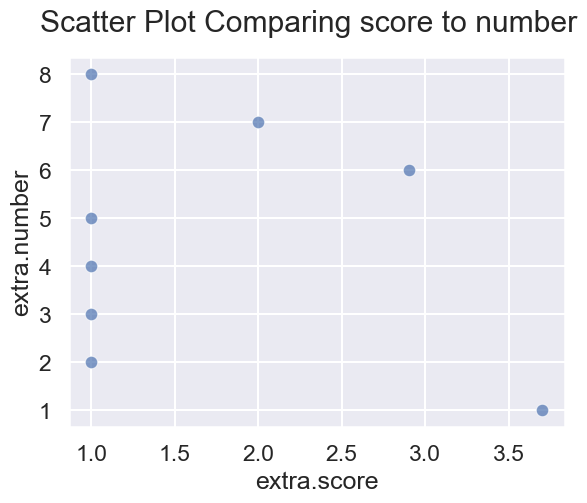

In [107]:
sns.scatterplot(data=merged_df, 
                x="extra.score", 
                y="extra.number",
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing score to number")
plt.show()

In [108]:
merged_df.corr() #to check if there is a correlation

C:\Users\MizCeey\AppData\Local\Temp\ipykernel_26496\35518180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr() #to check if there is a correlation


,empty_slots,free_bikes,latitude,longitude_x,extra.number,extra.reviews,extra.score,distance,longitude_y,geocodes.roof.latitude,geocodes.roof.longitude,geocodes.drop_off.latitude,geocodes.drop_off.longitude
empty_slots,1.000000,NaN,-0.195256,0.141832,0.082479,-0.216444,-0.264906,NaN,NaN,NaN,NaN,NaN,NaN
free_bikes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.195256,NaN,1.000000,0.394618,-0.018932,0.364165,0.386895,0.221291,0.676051,1.000000,0.736132,0.990556,0.540018
longitude_x,0.141832,NaN,0.394618,1.000000,-0.074007,-0.506313,-0.545660,NaN,NaN,NaN,NaN,NaN,NaN
extra.number,0.082479,NaN,-0.018932,-0.074007,1.000000,-0.402661,-0.223953,NaN,NaN,NaN,NaN,NaN,NaN
extra.reviews,-0.216444,NaN,0.364165,-0.506313,-0.402661,1.000000,0.879173,NaN,NaN,NaN,NaN,NaN,NaN
extra.score,-0.264906,NaN,0.386895,-0.545660,-0.223953,0.879173,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
distance,NaN,NaN,0.221291,NaN,NaN,NaN,NaN,1.000000,-0.004842,0.511262,0.864597,0.121977,0.817518
longitude_y,NaN,NaN,0.676051,NaN,NaN,NaN,NaN,-0.004842,1.000000,0.736132,1.000000,0.498468,0.999133
geocodes.roof.latitude,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.511262,0.736132,1.000000,0.736132,0.990556,0.540018


C:\Users\MizCeey\AppData\Local\Temp\ipykernel_26496\3699120657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr())


<Axes: >

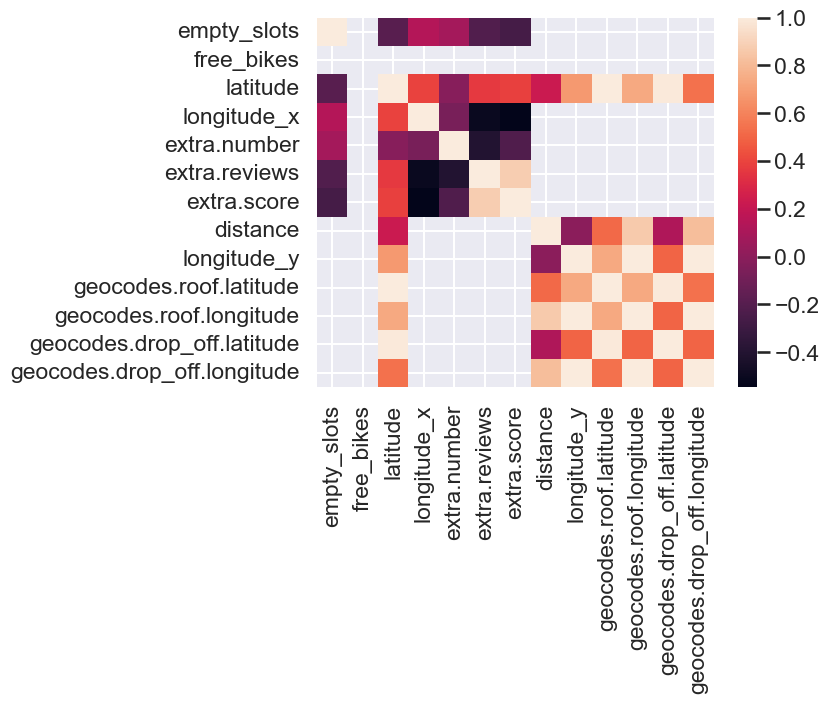

In [109]:
sns.heatmap(merged_df.corr())

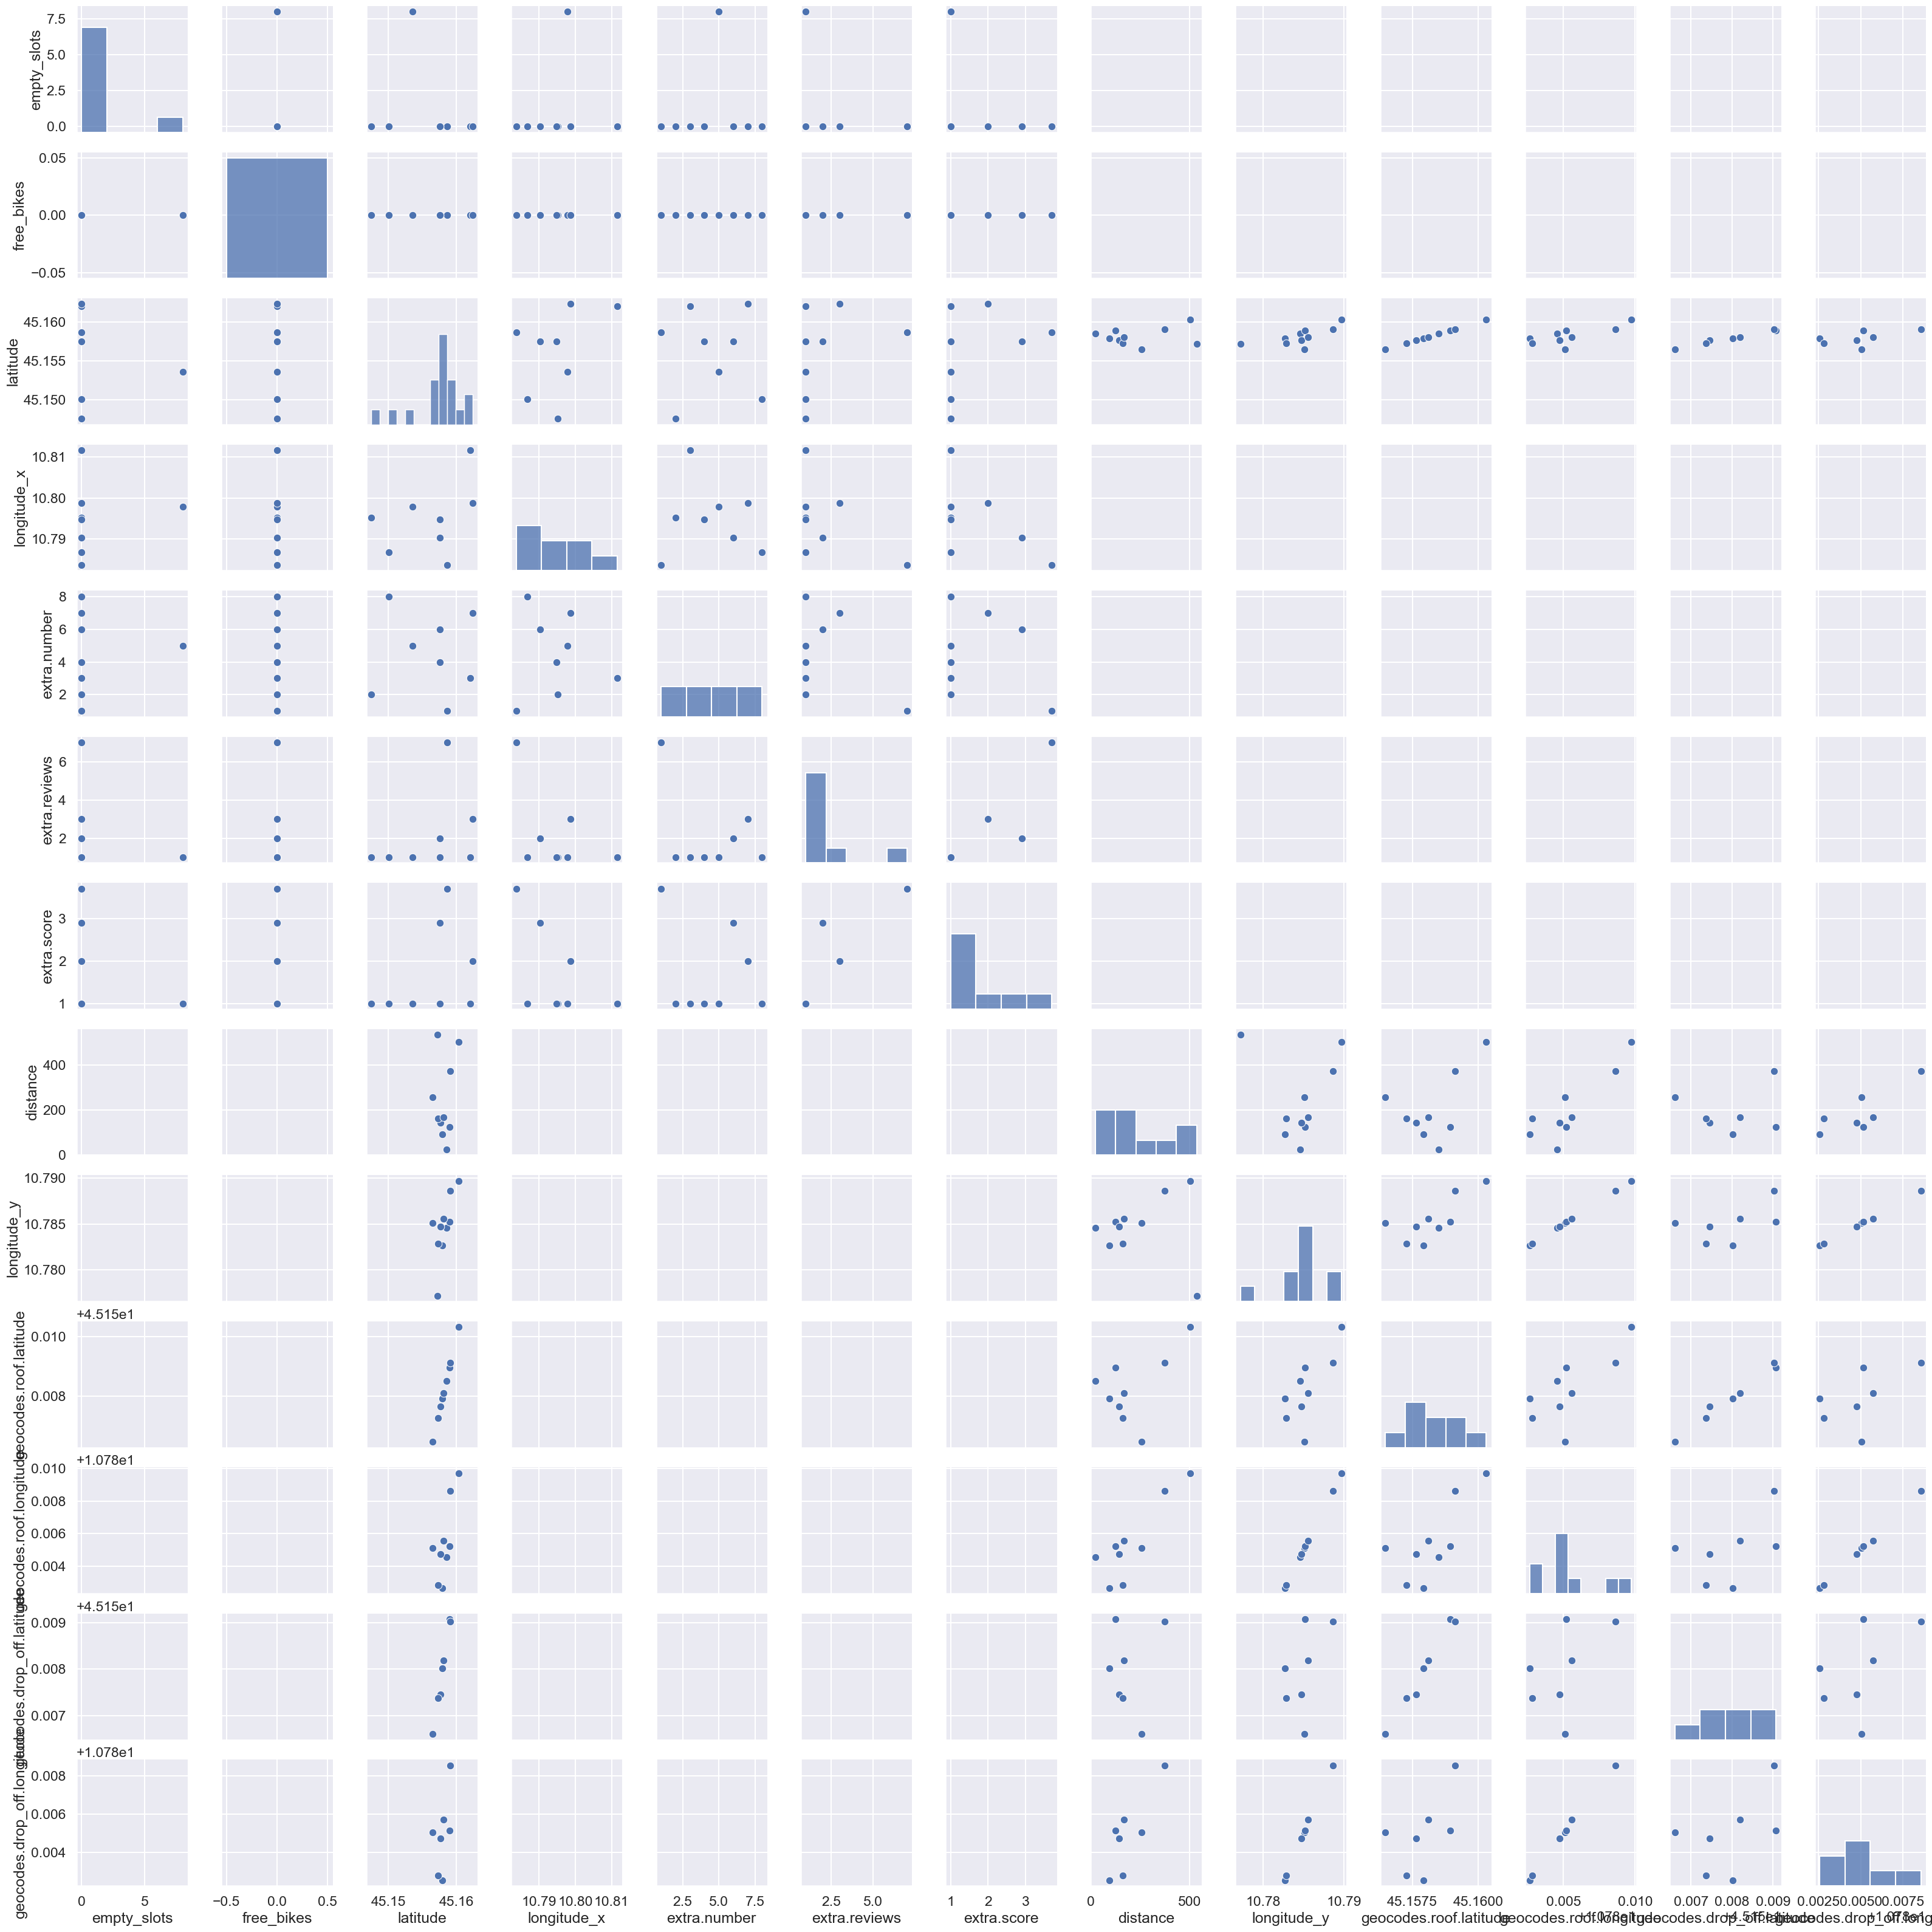

In [110]:
sns.pairplot(merged_df)
plt.show()
#to view and compare many distributions at the same time

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [111]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [112]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.